In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from fastText import train_supervised, train_unsupervised, load_model
from pathlib import Path
%matplotlib inline

In [63]:
psychic_learners_dir = Path.cwd()
BIG_CATEGORY = 'fashion'
PROBA_FOLDER = psychic_learners_dir / 'data' / 'probabilities' / BIG_CATEGORY
TRAIN_CSV = str(psychic_learners_dir / 'data' / f'{BIG_CATEGORY}_train_split.csv')
VALID_CSV = str(psychic_learners_dir / 'data' / f'{BIG_CATEGORY}_valid_split.csv')
TEST_CSV = str(psychic_learners_dir / 'data' / f'{BIG_CATEGORY}_test_split.csv')
N_CLASSES_FOR_CATEGORIES = {'beauty': 17, 'fashion': 14, 'mobile': 27}
N_CLASSES = N_CLASSES_FOR_CATEGORIES[BIG_CATEGORY]

In [64]:
valid_df = pd.read_csv(VALID_CSV)

In [65]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          number_categories=False,
                          normalize_axis=1):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if number_categories:
        categories = unique_labels(y_true, y_pred)
    else:
        categories = []
        for category in unique_labels(y_true, y_pred):
            categories.append(classes[category])
    if normalize and normalize_axis == 1:
        cm = cm.astype('float') / cm.sum(axis=normalize_axis)[:, np.newaxis]
    elif normalize and normalize_axis == 0:
        cm = cm.astype('float') / cm.sum(axis=normalize_axis)[np.newaxis, :]
        
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=categories, yticklabels=categories,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.set_size_inches(16,16)
    return ax

In [66]:
[x.name for x in PROBA_FOLDER.iterdir() if x.is_dir()]

['extractions_fasttext',
 'title_fasttext',
 'bert_v1',
 'word_rnn',
 'image_model',
 'rcnn',
 'char_cnn',
 'word_cnn']

In [67]:
model_name = 'title_fasttext'
valid_probabilities = np.load(str(PROBA_FOLDER / model_name / 'valid.npy'))

In [68]:
labels = valid_df['Category'].values
preds = np.argmax(valid_probabilities, axis=1)
if BIG_CATEGORY == 'fashion':
    preds += 17
elif BIG_CATEGORY == 'mobile':
    preds += 31

In [69]:
with open(str(psychic_learners_dir / 'data' / 'categories.json'), 'r') as f:
    categories_mapping = json.load(f)

In [70]:
class_mapping = {}
for key, item in categories_mapping[BIG_CATEGORY.capitalize()].items():
    class_mapping[item] = key

Normalized confusion matrix
[[3.89610390e-01 1.02078556e-02 2.30019493e-02 9.89010989e-03
  2.24887556e-03 1.23219099e-02 1.34228188e-02 8.01603206e-03
  9.90799717e-03 6.54396728e-03 8.49184783e-03 8.12347685e-03
  5.22648084e-03 3.12500000e-02]
 [2.11038961e-01 6.21347733e-01 1.37621832e-01 1.85164835e-01
  2.54872564e-01 2.62610705e-01 4.36241611e-02 1.88376754e-01
  3.08563340e-02 4.36264485e-02 3.15896739e-02 4.71161657e-02
  1.39372822e-02 3.12500000e-02]
 [8.11688312e-02 4.52696205e-02 6.33528265e-01 4.36813187e-02
  4.34782609e-02 4.54370427e-02 6.71140940e-02 5.01002004e-02
  1.41542817e-03 5.18064076e-03 3.39673913e-04 4.87408611e-03
  3.48432056e-03 0.00000000e+00]
 [4.87012987e-02 8.04053554e-02 7.52436647e-02 6.18131868e-01
  6.37181409e-02 5.58336542e-02 9.39597315e-02 1.16232465e-01
  4.24628450e-03 9.67961827e-03 6.79347826e-03 8.93582453e-03
  3.48432056e-03 3.12500000e-02]
 [2.92207792e-02 6.97536800e-02 3.31384016e-02 3.87362637e-02
  4.85007496e-01 6.00693107e-02 1.

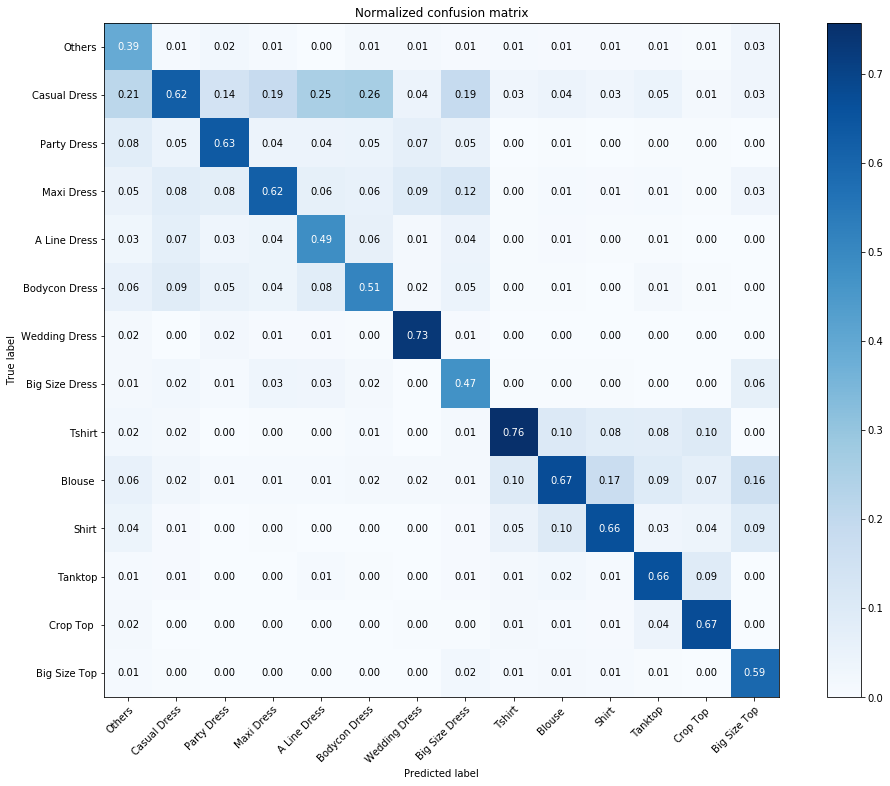

In [71]:
plot_confusion_matrix(labels, preds, class_mapping, normalize=True, 
                      number_categories=False, normalize_axis=0)